time_500
          mean          std
name                       
17    6780.000  3884.457494
18    6650.000  3480.162183
19    6766.250  3671.853033
20    6795.000  3613.688817
21    6670.625  3765.874452
                     mean          std
behavior                              
 finisher     6686.547619  1491.856163
 frontrunner  3090.238095   598.911145
 sprinter     6059.642857  1823.006489
 steady       9893.690476  3331.687978
time_1000
           mean          std
name                        
17    12967.500  7157.392291
18    12679.375  6324.940160
19    12912.500  6721.535640
20    12960.000  6539.830729
21    12699.375  6932.843331
                      mean          std
behavior                               
 finisher     11046.547619  2241.482472
 frontrunner   6686.666667  1358.403637
 sprinter     11139.285714  2935.710129
 steady       18837.500000  6173.560068
time_1500
           mean           std
name                         
17    19340.000  10372.421019
18    18

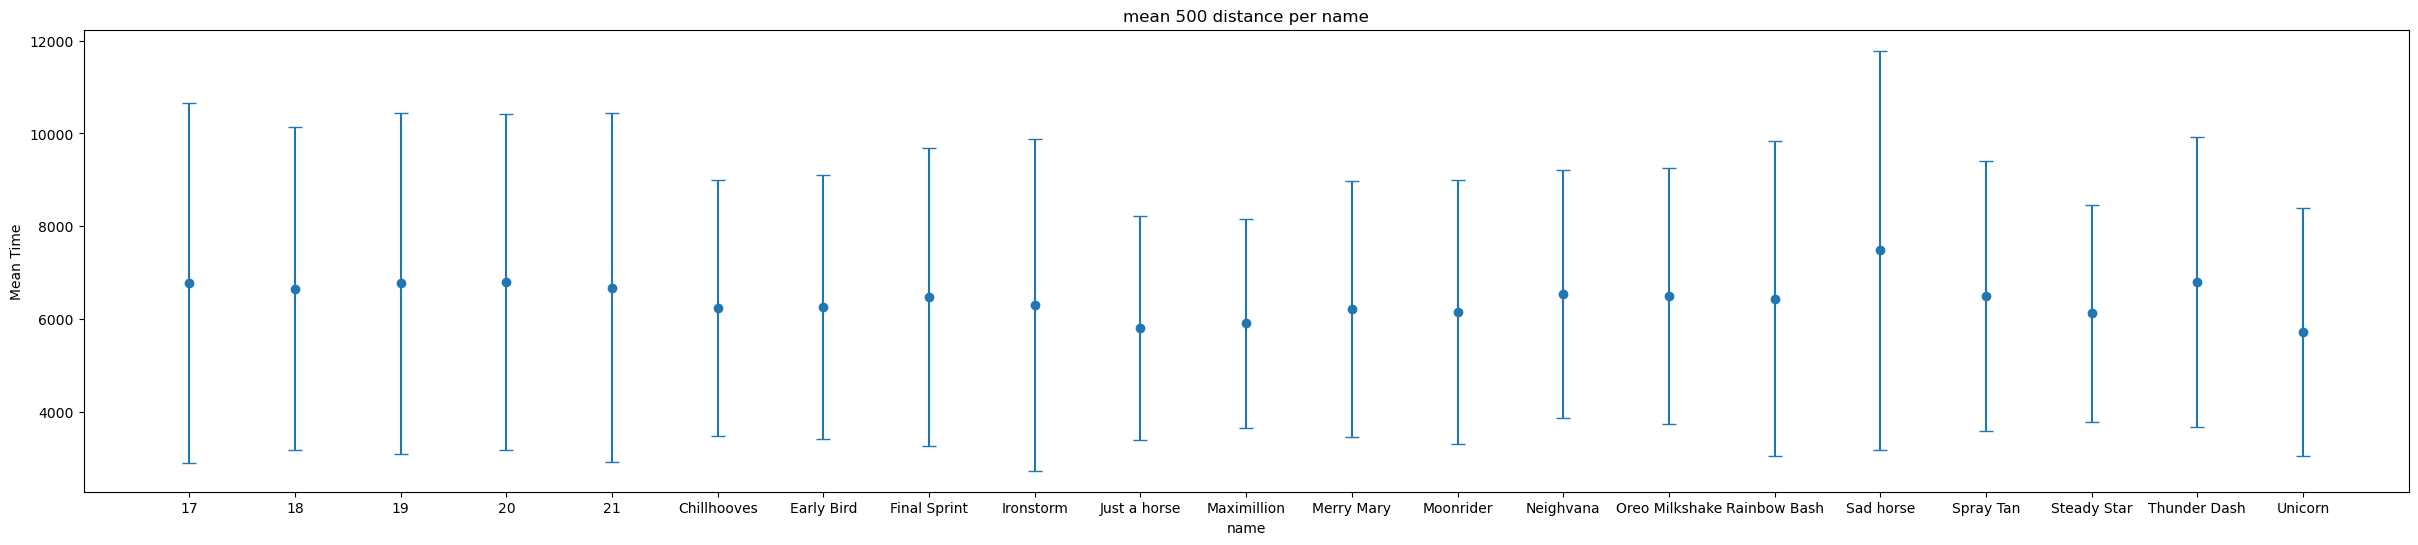

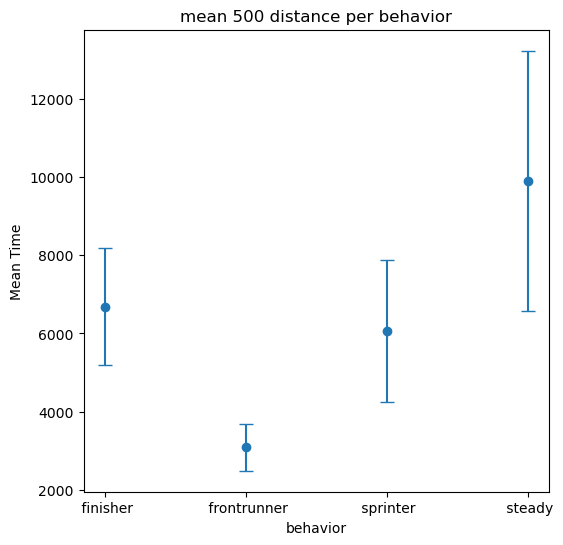

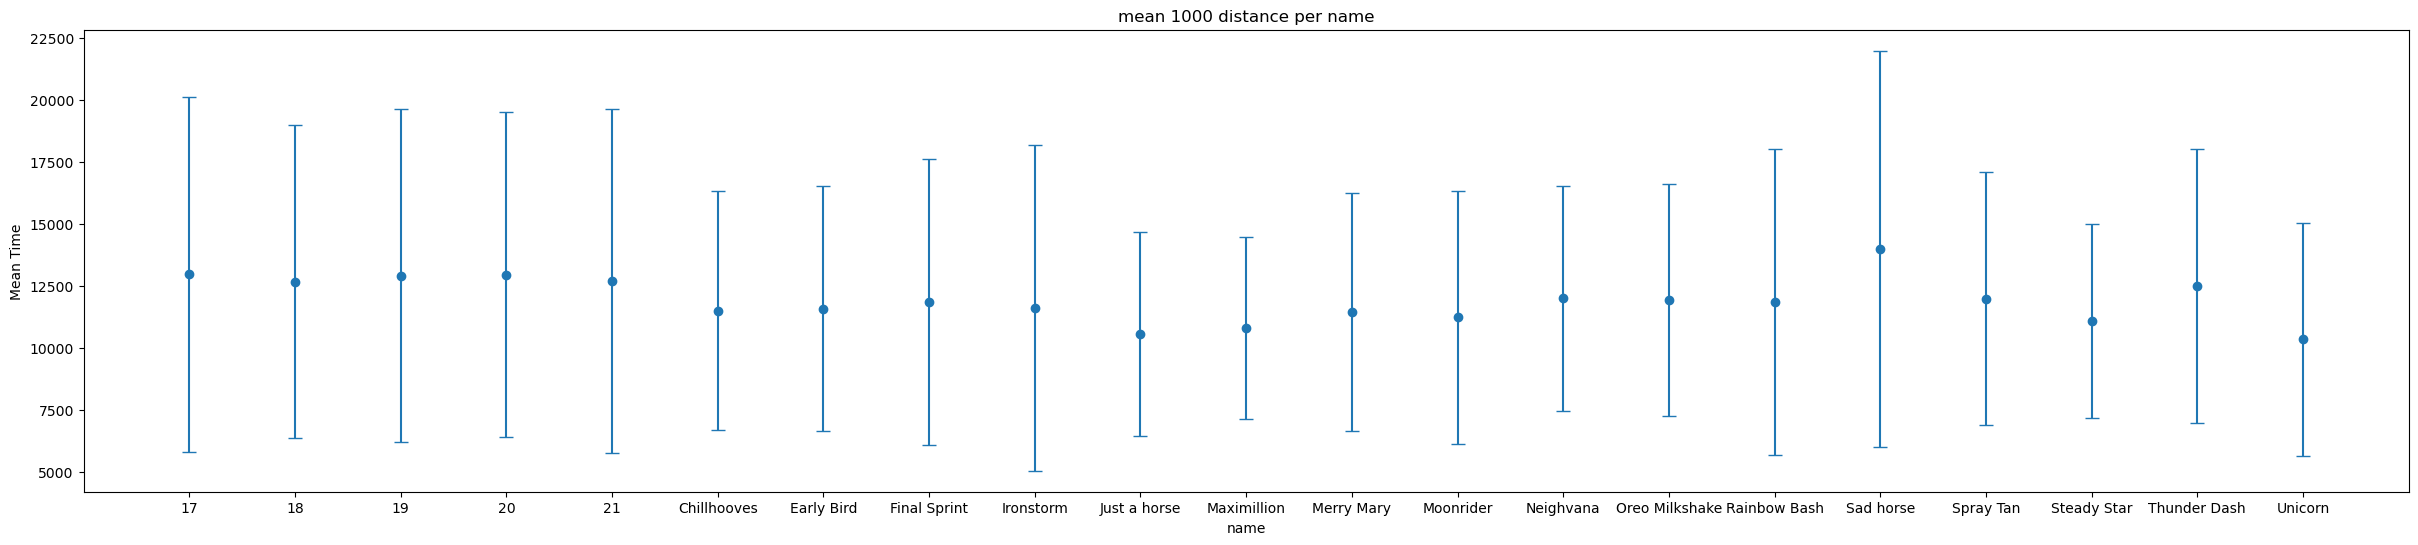

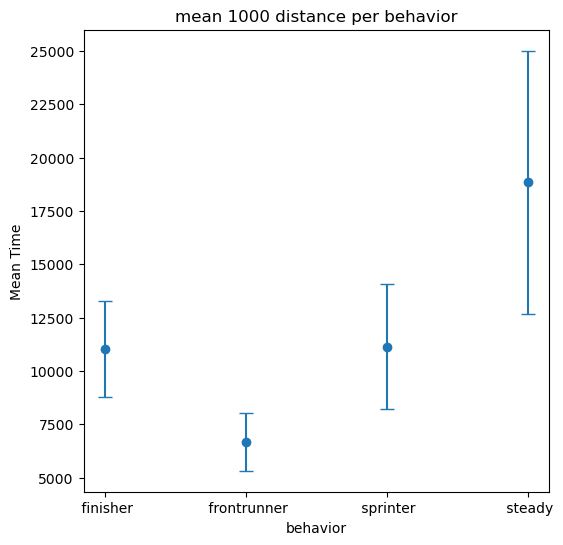

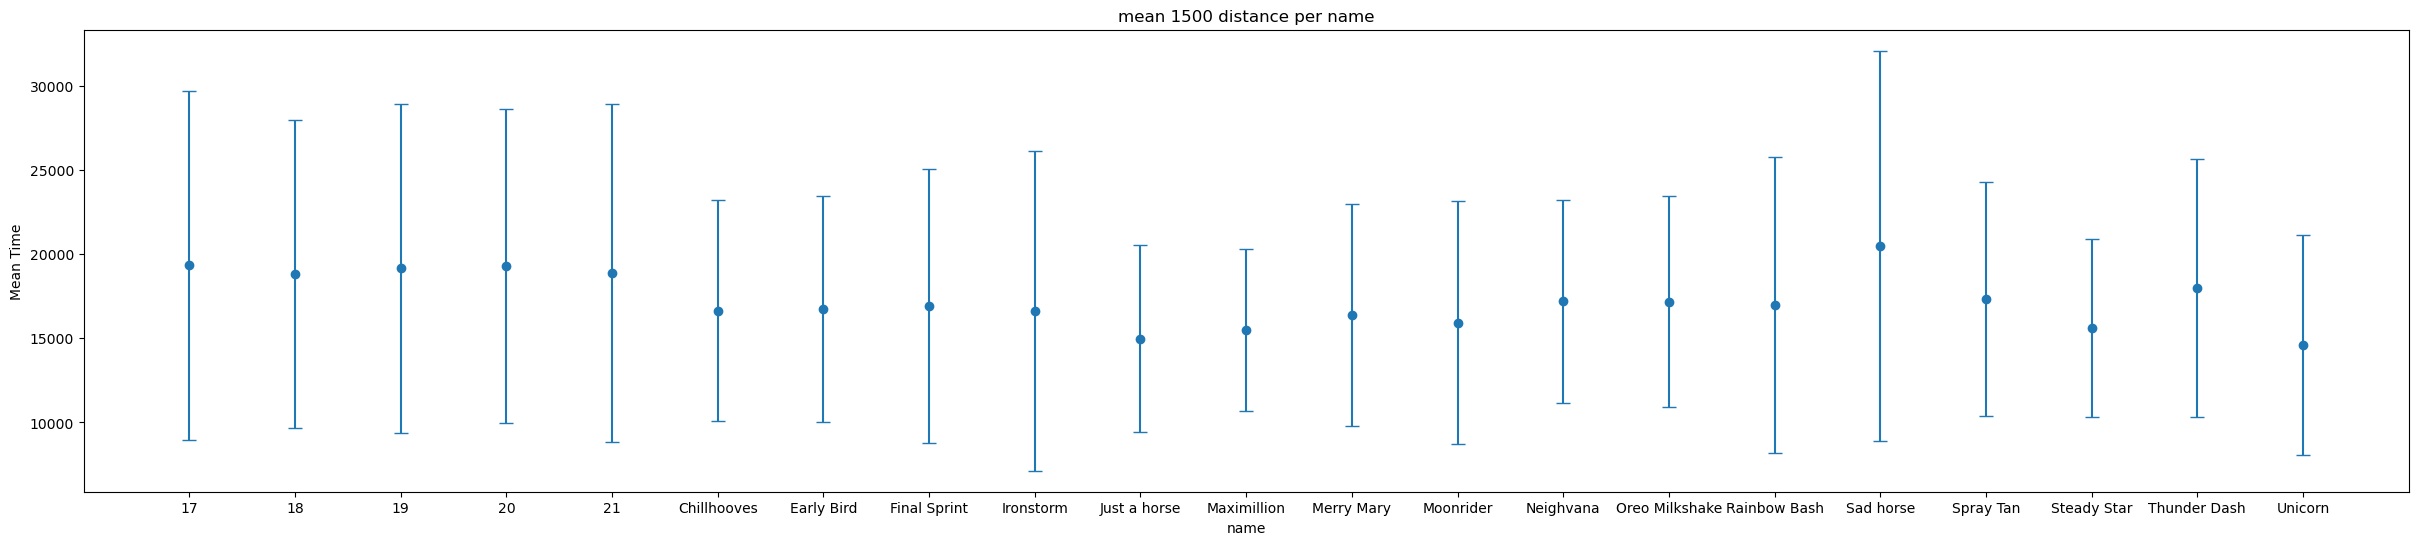

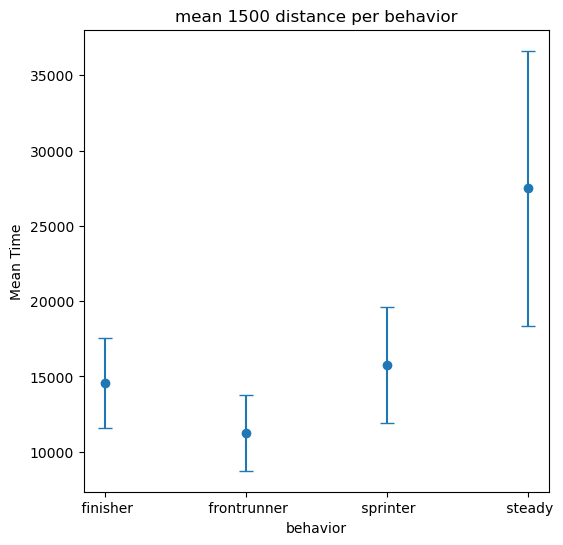

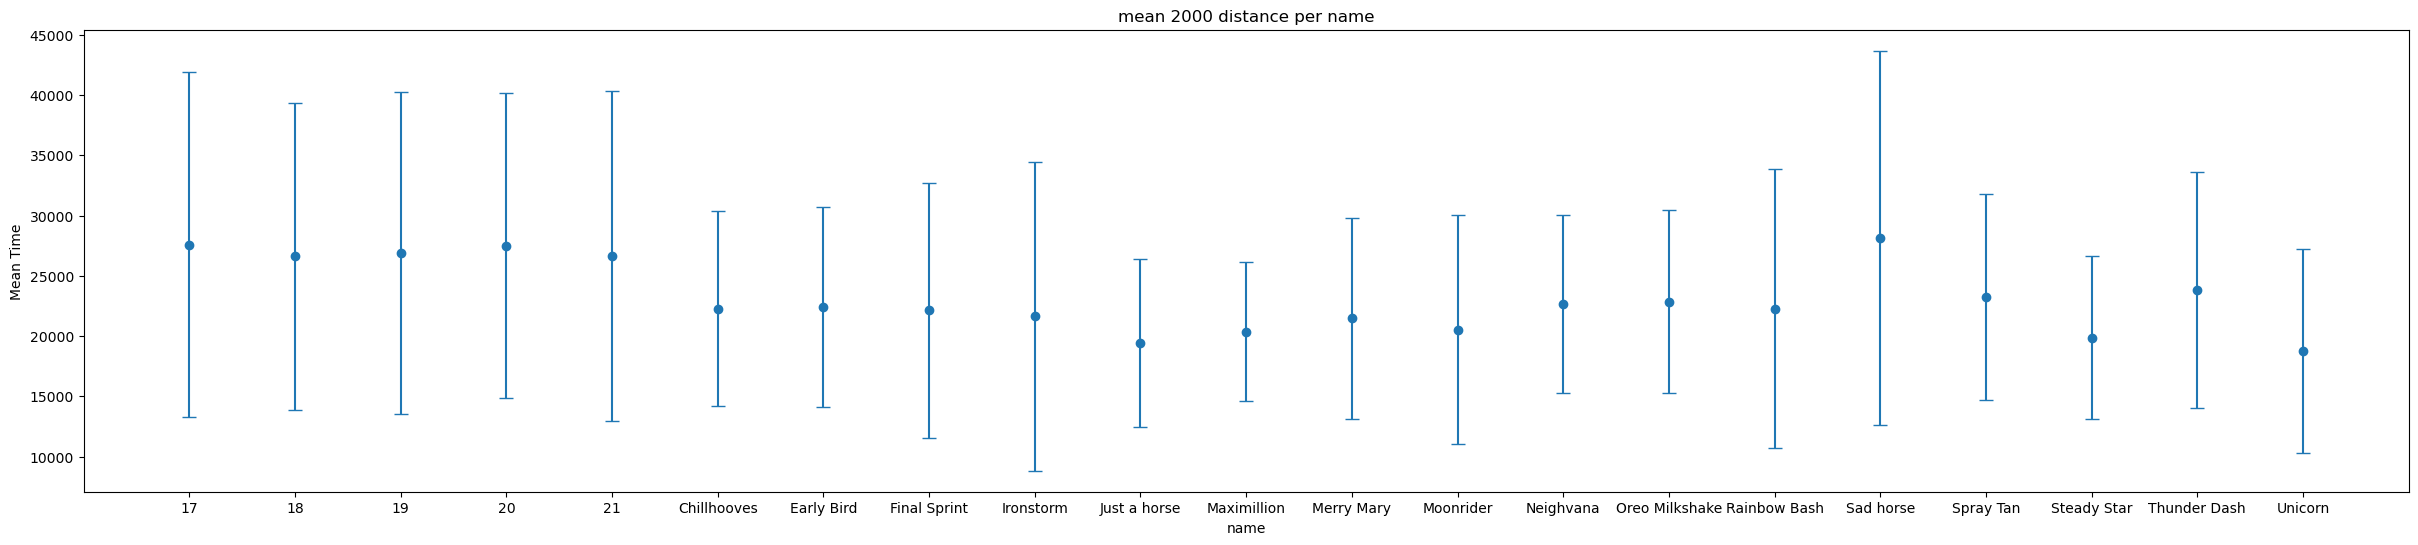

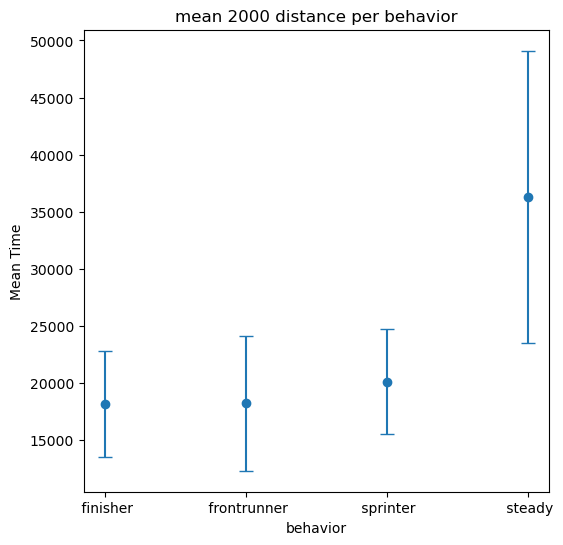

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# with open('output.csv', 'r') as f:
#   contents = f.read()
#   print(contents)

# Read CSV
df = pd.read_csv('output.csv')

distances = [500, 1000, 1500, 2000]
for dist in distances:
  col_name = f"time_{str(dist)}"

  print(col_name)

  time_per_name = df.groupby('name')[col_name].agg(['mean', 'std'])
  time_per_behavior = df.groupby('behavior')[col_name].agg(['mean', 'std'])

  # Preview the data
  print(time_per_name.head())
  print(time_per_behavior.head())

  # Example: Plot column 'A' vs column 'B'
  # plt.figure()
  # time_per_name.plot(kind='bar', xlabel='name', ylabel='Mean Time', title=col_name+' per name', rot=0)
  # plt.grid(True)
  # plt.tight_layout()

  plt.figure(
     figsize=(30, 6)
     ) 
  plt.errorbar(
      time_per_name.index,           # X values (type names)
      time_per_name['mean'],          # Y values (mean)
      yerr=time_per_name['std'],      # Error bars (standard deviation)
      fmt='o',                  # Marker style
      capsize=5,# Cap size for error bars
    )
  plt.title(f"mean {str(dist)} distance per name")
  plt.xlabel('name')
  plt.ylabel('Mean Time')
  
  plt.figure(
    figsize=(6, 6),
    ) 
  plt.errorbar(
      time_per_behavior.index,           # X values (type names)
      time_per_behavior['mean'],          # Y values (mean)
      yerr=time_per_behavior['std'],      # Error bars (standard deviation)
      fmt='o',                  # Marker style
      capsize=5,# Cap size for error bars
    )
  plt.title(f"mean {str(dist)} distance per behavior")
  plt.xlabel('behavior')
  plt.ylabel('Mean Time')

plt.show()